Dataset loaded successfully!
Feature matrix shape: (569, 30)
Target vector shape: (569,)

Classes: ['malignant' 'benign']

First 5 rows of dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Training set: (455, 30)
Test set: (114, 30)

SVM model training complete!

Test Accuracy: 0.9825

Classification Report:

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[41  1]
 [ 1 71]]


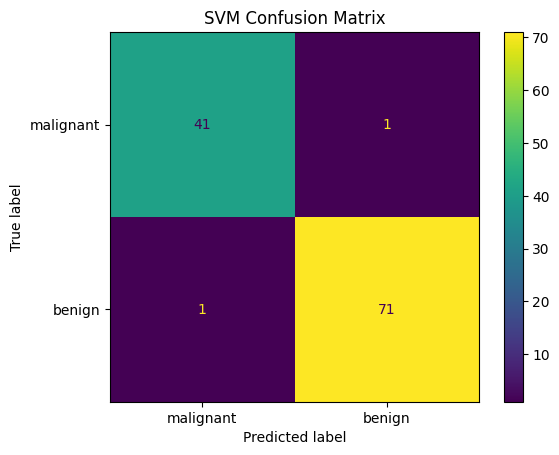


ROC-AUC Score: 0.9950


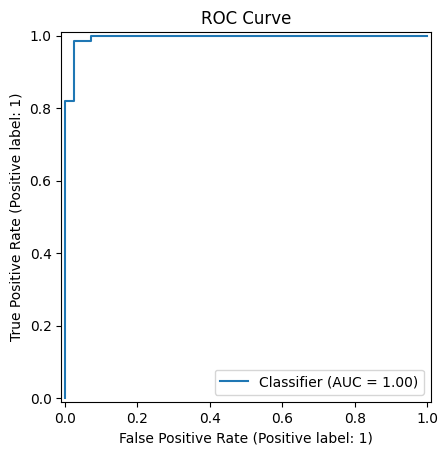


Cross Validation Accuracies: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736 ± 0.0147

Best Parameters from GridSearch: {'svm__C': 10, 'svm__gamma': 0.01}
Best CV Accuracy: 0.9802

Test Accuracy with Best Model: 0.9825

Best Model Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [1]:
# Support Vector Machine (SVM) Classification - Complete Program in One Cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
)

# -------------------- LOAD DATASET --------------------
data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset loaded successfully!")
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nClasses:", data.target_names)

# Convert to DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("\nFirst 5 rows of dataset:")
display(df.head())

# -------------------- TRAIN–TEST SPLIT --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set:", X_train.shape)
print("Test set:", X_test.shape)

# -------------------- BUILD SVM PIPELINE --------------------
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

# -------------------- TRAIN MODEL --------------------
svm_pipeline.fit(X_train, y_train)
print("\nSVM model training complete!")

# -------------------- TEST PERFORMANCE --------------------
y_pred = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

# -------------------- ROC–AUC --------------------
y_proba = svm_pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

# -------------------- CROSS VALIDATION --------------------
cv_scores = cross_val_score(svm_pipeline, X, y, cv=5, scoring='accuracy')
print("\nCross Validation Accuracies:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# -------------------- HYPERPARAMETER TUNING --------------------
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters from GridSearch:", grid.best_params_)
print(f"Best CV Accuracy: {grid.best_score_:.4f}")

# Evaluate best model on test set
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)

print(f"\nTest Accuracy with Best Model: {best_acc:.4f}")
print("\nBest Model Classification Report:")
print(classification_report(y_test, best_pred, target_names=data.target_names))
